In [1]:
##download dada2 if not installed
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("dada2")

In [2]:
library(dada2)


Loading required package: Rcpp



In [3]:
path <- "/home/ashraf/Danit16S/Fastq/"
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)


In [4]:
length(fnFs)

[1] 22

In [5]:
c<-as.data.frame(fnFs)
c[1,1]


[1] /home/ashraf/Danit16S/Fastq//1A-D-S_S115_L001_R1_001.fastq.gz
22 Levels: /home/ashraf/Danit16S/Fastq//1A-D-S_S115_L001_R1_001.fastq.gz ...

In [6]:
c<-as.data.frame(fnFs)
for (i in 1:length(fnFs)){
    x<-paste0("pear -f ",fnFs[i]," -r ",fnRs[i]," -o ",sample.names[i]," -v 5")
    system(x)
    v<-paste0("mv ",sample.names[i], ".assembled.fastq"," ",sample.names[i],"_L001_R1_001.fastq")
    system(v)
}
r<-paste0("rm *.discarded.fastq")
system(r)
r<-paste0("rm *.unassembled.*")
system(r)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



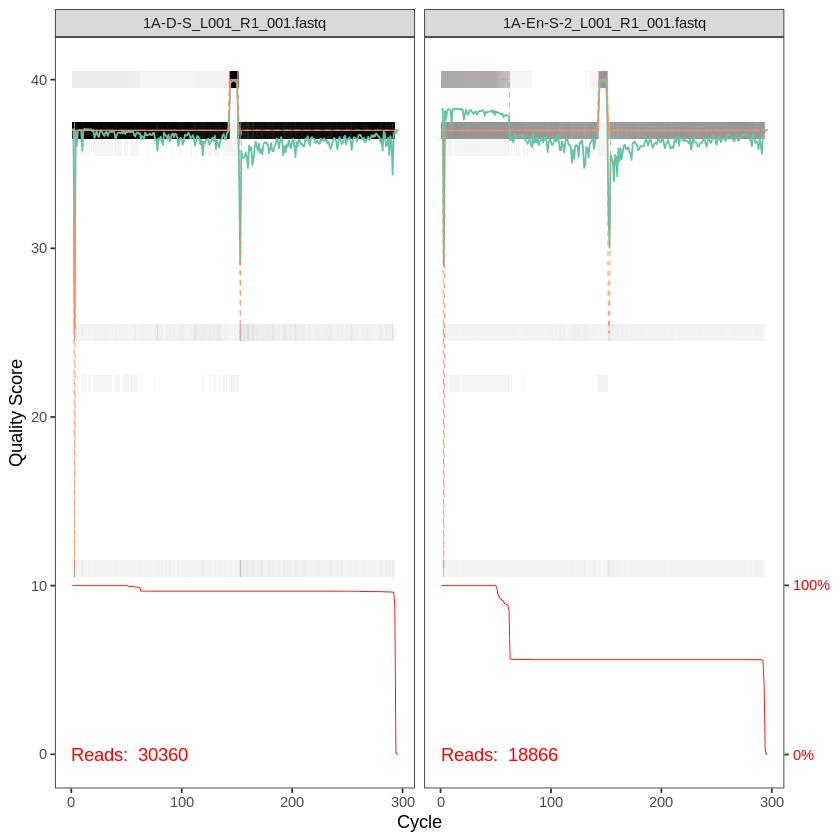

In [7]:
path <- "/home/ashraf/Danit16S/"

fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)
plotQualityProfile(fnFs[1:2])

In [8]:
filtFs <- file.path(path, "filtered", paste0(sample.names, "_F_filt.fastq.gz"))
names(filtFs) <- sample.names
out <- filterAndTrim(fnFs, filtFs,maxN=0,
                         minQ=3, rm.phix=TRUE,minLen=100,trimLeft=20,
                         , compress=TRUE, multithread=TRUE, verbose=TRUE)
head(out)

Creating output directory: /home/ashraf/Danit16S//filtered



,reads.in,reads.out
1A-D-S_L001_R1_001.fastq,30360,29367
1A-En-S-2_L001_R1_001.fastq,18866,10579
1A-Ex-S-2_L001_R1_001.fastq,31542,24670
1B-En-S-2_L001_R1_001.fastq,44257,22105
1B-Ex-S-2_L001_R1_001.fastq,29829,27856
2A-En-S-2_L001_R1_001.fastq,46563,20542


In [9]:
out

,reads.in,reads.out
1A-D-S_L001_R1_001.fastq,30360,29367
1A-En-S-2_L001_R1_001.fastq,18866,10579
1A-Ex-S-2_L001_R1_001.fastq,31542,24670
1B-En-S-2_L001_R1_001.fastq,44257,22105
1B-Ex-S-2_L001_R1_001.fastq,29829,27856
2A-En-S-2_L001_R1_001.fastq,46563,20542
2A-Ex-S-2_L001_R1_001.fastq,24370,23656
2B-D-S_L001_R1_001.fastq,28030,27758
2B-En-S-2_L001_R1_001.fastq,48243,12370
2B-Ex-S-2_L001_R1_001.fastq,27393,25570


In [10]:
r<-paste0("rm *.fastq")
system(r)


In [11]:
errF <- learnErrors(filtFs, multithread=TRUE, MAX_CONSIST=40)


101709097 total bases in 373055 reads from 17 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


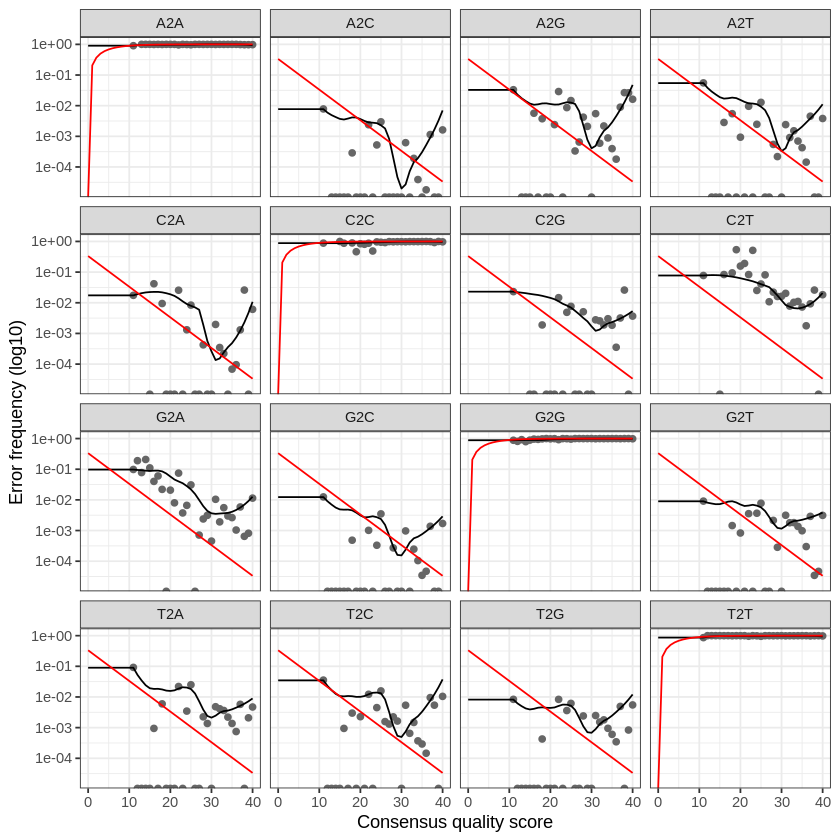

In [12]:
plotErrors(errF, nominalQ=TRUE)


In [13]:
dadaFs <- dada(filtFs, err=errF, multithread=TRUE)


Sample 1 - 29367 reads in 17800 unique sequences.
Sample 2 - 10579 reads in 7416 unique sequences.
Sample 3 - 24670 reads in 17546 unique sequences.
Sample 4 - 22105 reads in 14302 unique sequences.
Sample 5 - 27856 reads in 20067 unique sequences.
Sample 6 - 20542 reads in 11907 unique sequences.
Sample 7 - 23656 reads in 15685 unique sequences.
Sample 8 - 27758 reads in 16817 unique sequences.
Sample 9 - 12370 reads in 8156 unique sequences.
Sample 10 - 25570 reads in 17666 unique sequences.
Sample 11 - 25233 reads in 19408 unique sequences.
Sample 12 - 25175 reads in 16845 unique sequences.
Sample 13 - 20313 reads in 11967 unique sequences.
Sample 14 - 21370 reads in 14520 unique sequences.
Sample 15 - 16660 reads in 11792 unique sequences.
Sample 16 - 20663 reads in 11697 unique sequences.
Sample 17 - 19168 reads in 12837 unique sequences.
Sample 18 - 30606 reads in 18084 unique sequences.
Sample 19 - 28181 reads in 18806 unique sequences.
Sample 20 - 15880 reads in 11222 unique se

In [14]:
dadaFs[[1]]


sequence,abundance,n0,n1,nunq,pval,birth_type,birth_pval,birth_fold,birth_ham,birth_qave
<chr>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dbl>
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCCTGTAGTCC,1109,468,357,497,0,I,NA,NA,NA,NA
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCCGGTAGTCC,968,425,332,406,0,A,0,1.096398e+02,1,37.00000
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCCGGTAGTCC,904,408,311,375,0,A,0,5.732733e+02,1,37.00000
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCCTGTAGTCC,902,398,301,385,0,A,0,1.670842e+02,1,37.00000
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCCAGTAGTCC,790,355,255,344,0,A,0,1.238405e+02,1,37.00000
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCTGGTAGTCC,786,350,257,344,0,A,0,4.136206e+02,1,37.00000
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCGTGTAGTCC,735,346,234,318,0,A,0,2.387926e+02,1,37.00000
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCC,753,343,252,332,0,A,0,2.461061e+02,1,37.00000
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCTTGTAGTCC,758,318,242,366,0,A,0,9.746235e+01,1,36.00000


In [15]:
seqtab <- makeSequenceTable(dadaFs)
dim(seqtab)

[1]   22 3391

In [16]:
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))


 135  138  187  197  221  234  239  240  241  242  243  244  247  248  249  253 
   2    2    1    1    2    1    1    5    9    2   13    5    6    1    5    1 
 257  261  262  265  266  267  268  270  271  272  273  274  275  276 
   1    1    2    4    1    1    9    8    7  470 2677  147    5    1 

In [17]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)

Identified 458 bimeras out of 3391 input sequences.



[1]   22 2933

In [18]:
sum(seqtab.nochim)/sum(seqtab)


[1] 0.826138

In [19]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), rowSums(seqtab.nochim))
colnames(track) <- c("merged", "filtered","denoisedF","nonchim")
rownames(track) <- sample.names
head(track)
write.csv(track, "track.csv")

,merged,filtered,denoisedF,nonchim
1A-D-S,30360,29367,26489,23831
1A-En-S-2,18866,10579,10232,9221
1A-Ex-S-2,31542,24670,23004,18935
1B-En-S-2,44257,22105,21574,17724
1B-Ex-S-2,29829,27856,26359,23827
2A-En-S-2,46563,20542,20137,15700


In [20]:
taxa <- assignTaxonomy(seqtab.nochim, "/home/ashraf/Danit16S/dada2/silva_nr99_v138_train_set.fa.gz", multithread=TRUE,minBoot=80)

In [21]:
taxa<- addSpecies(taxa, "/home/ashraf/Danit16S/dada2/silva_species_assignment_v138.fa.gz")


In [23]:
 #write output
    write.csv(taxa,"taxonomy.csv")
    write.csv(seqtab.nochim,"ASV_table.csv")
    saveRDS(seqtab.nochim,"seqtab.nochim.rds")
    